# Virat Kohli's All Century Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Reading and Viewing Data

In [2]:
df = pd.read_csv("Virat-Kohli-International-Cricket-Centuries.csv")
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


In [3]:
df.shape

(80, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       80 non-null     int64 
 1   Runs      80 non-null     object
 2   Against   80 non-null     object
 3   Position  80 non-null     int64 
 4   Innings   80 non-null     int64 
 5   Venue     80 non-null     object
 6   Ground    80 non-null     object
 7   Date      80 non-null     object
 8   Result    80 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.8+ KB


## Cleaning Data

In [5]:
df = df.drop(['Venue'],axis=1)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")
df

,No.,Runs,Against,Position,Innings,Ground,Date,Result
0,1,107,Sri Lanka,4,2,Home,2009-12-24,Won
1,2,102*,Bangladesh,3,2,Away,2010-01-11,Won
2,3,118,Australia,3,2,Home,2010-10-20,Won
3,4,105,New Zealand,3,1,Home,2010-11-28,Won
4,5,100*,Bangladesh,4,1,Away,2011-02-19,Won
...,...,...,...,...,...,...,...,...
75,76,121,West Indies,4,1,Away,2023-07-20,Drawn
76,77,122*,Pakistan,3,1,Neutral,2023-09-11,Won
77,78,103*,Bangladesh,3,2,Home,2023-10-19,Won
78,79,101*,South Africa,3,1,Home,2023-11-05,Won


In [7]:
df['Year'] = df['Date'].dt.year
df

,No.,Runs,Against,Position,Innings,Ground,Date,Result,Year
0,1,107,Sri Lanka,4,2,Home,2009-12-24,Won,2009
1,2,102*,Bangladesh,3,2,Away,2010-01-11,Won,2010
2,3,118,Australia,3,2,Home,2010-10-20,Won,2010
3,4,105,New Zealand,3,1,Home,2010-11-28,Won,2010
4,5,100*,Bangladesh,4,1,Away,2011-02-19,Won,2011
...,...,...,...,...,...,...,...,...,...
75,76,121,West Indies,4,1,Away,2023-07-20,Drawn,2023
76,77,122*,Pakistan,3,1,Neutral,2023-09-11,Won,2023
77,78,103*,Bangladesh,3,2,Home,2023-10-19,Won,2023
78,79,101*,South Africa,3,1,Home,2023-11-05,Won,2023


In [8]:
df['NotOut']=df['Runs'].str.contains(r'\*').astype(int)
df

,No.,Runs,Against,Position,Innings,Ground,Date,Result,Year,NotOut
0,1,107,Sri Lanka,4,2,Home,2009-12-24,Won,2009,0
1,2,102*,Bangladesh,3,2,Away,2010-01-11,Won,2010,1
2,3,118,Australia,3,2,Home,2010-10-20,Won,2010,0
3,4,105,New Zealand,3,1,Home,2010-11-28,Won,2010,0
4,5,100*,Bangladesh,4,1,Away,2011-02-19,Won,2011,1
...,...,...,...,...,...,...,...,...,...,...
75,76,121,West Indies,4,1,Away,2023-07-20,Drawn,2023,0
76,77,122*,Pakistan,3,1,Neutral,2023-09-11,Won,2023,1
77,78,103*,Bangladesh,3,2,Home,2023-10-19,Won,2023,1
78,79,101*,South Africa,3,1,Home,2023-11-05,Won,2023,1


In [9]:
df['Runs']=df['Runs'].str.replace('*','').astype(int)
df

,No.,Runs,Against,Position,Innings,Ground,Date,Result,Year,NotOut
0,1,107,Sri Lanka,4,2,Home,2009-12-24,Won,2009,0
1,2,102,Bangladesh,3,2,Away,2010-01-11,Won,2010,1
2,3,118,Australia,3,2,Home,2010-10-20,Won,2010,0
3,4,105,New Zealand,3,1,Home,2010-11-28,Won,2010,0
4,5,100,Bangladesh,4,1,Away,2011-02-19,Won,2011,1
...,...,...,...,...,...,...,...,...,...,...
75,76,121,West Indies,4,1,Away,2023-07-20,Drawn,2023,0
76,77,122,Pakistan,3,1,Neutral,2023-09-11,Won,2023,1
77,78,103,Bangladesh,3,2,Home,2023-10-19,Won,2023,1
78,79,101,South Africa,3,1,Home,2023-11-05,Won,2023,1


In [10]:
df['NotOut']=df['NotOut'].replace(0,'Out')
df['NotOut']=df['NotOut'].replace(1,'Not Out')
df

,No.,Runs,Against,Position,Innings,Ground,Date,Result,Year,NotOut
0,1,107,Sri Lanka,4,2,Home,2009-12-24,Won,2009,Out
1,2,102,Bangladesh,3,2,Away,2010-01-11,Won,2010,Not Out
2,3,118,Australia,3,2,Home,2010-10-20,Won,2010,Out
3,4,105,New Zealand,3,1,Home,2010-11-28,Won,2010,Out
4,5,100,Bangladesh,4,1,Away,2011-02-19,Won,2011,Not Out
...,...,...,...,...,...,...,...,...,...,...
75,76,121,West Indies,4,1,Away,2023-07-20,Drawn,2023,Out
76,77,122,Pakistan,3,1,Neutral,2023-09-11,Won,2023,Not Out
77,78,103,Bangladesh,3,2,Home,2023-10-19,Won,2023,Not Out
78,79,101,South Africa,3,1,Home,2023-11-05,Won,2023,Not Out


In [11]:
df['Against']=df['Against'].str.replace(" ","")
df

,No.,Runs,Against,Position,Innings,Ground,Date,Result,Year,NotOut
0,1,107,SriLanka,4,2,Home,2009-12-24,Won,2009,Out
1,2,102,Bangladesh,3,2,Away,2010-01-11,Won,2010,Not Out
2,3,118,Australia,3,2,Home,2010-10-20,Won,2010,Out
3,4,105,NewZealand,3,1,Home,2010-11-28,Won,2010,Out
4,5,100,Bangladesh,4,1,Away,2011-02-19,Won,2011,Not Out
...,...,...,...,...,...,...,...,...,...,...
75,76,121,WestIndies,4,1,Away,2023-07-20,Drawn,2023,Out
76,77,122,Pakistan,3,1,Neutral,2023-09-11,Won,2023,Not Out
77,78,103,Bangladesh,3,2,Home,2023-10-19,Won,2023,Not Out
78,79,101,SouthAfrica,3,1,Home,2023-11-05,Won,2023,Not Out


## Visualization and insights

In [12]:
average_run = df['Runs'].mean()
print(f"The Average Run Virat Kohli Scores whenever he scores a century is {average_run}")

The Average Run Virat Kohli Scores whenever he scores a century is 131.55


#### The Average Run of Virat Kohli Whenever he Scores Century is 131.55

### Number Of Centuries in Each Year -

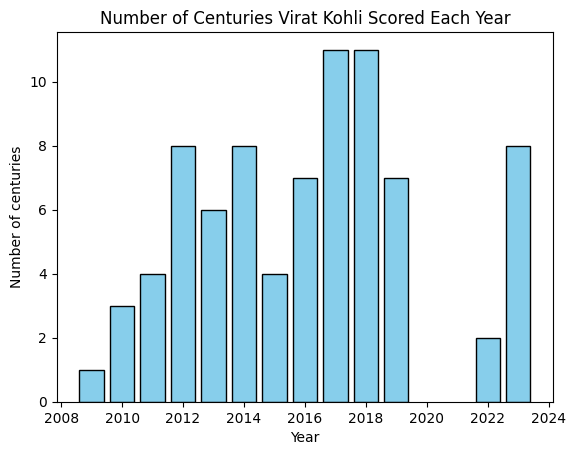

In [13]:
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts().values,color='skyblue', edgecolor='black')
plt.title('Number of Centuries Virat Kohli Scored Each Year')    
plt.xlabel('Year')
plt.ylabel('Number of centuries')
plt.show()

#### Virat Kohli Gave his Peak Performance in 2017-2018 Scoring 11 Centuries in both the years

### Impact of Centuries - 

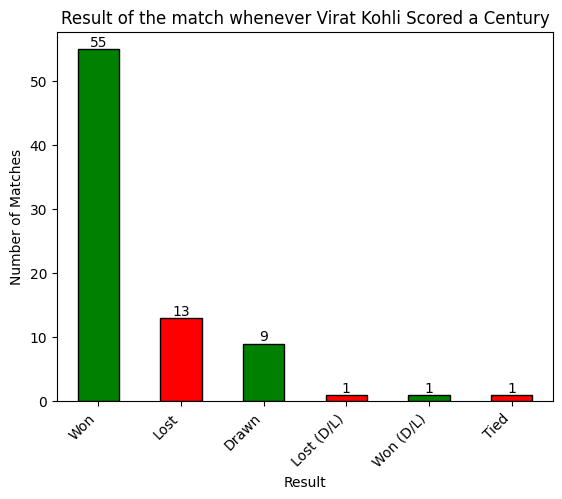

In [14]:
colors=['green','red']
df['Result'].value_counts().plot(kind='bar',color=colors,edgecolor='black')
plt.title('Result of the match whenever Virat Kohli Scored a Century')

for index, value in enumerate(df['Result'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Result')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of Matches')
plt.show()

#### Out of 80 Matches Virat Kohli Scored Century India Won in 56 Matches Loosing only 14

### Analyzing The Venues Where Virat Kohli Scored Centuries - 

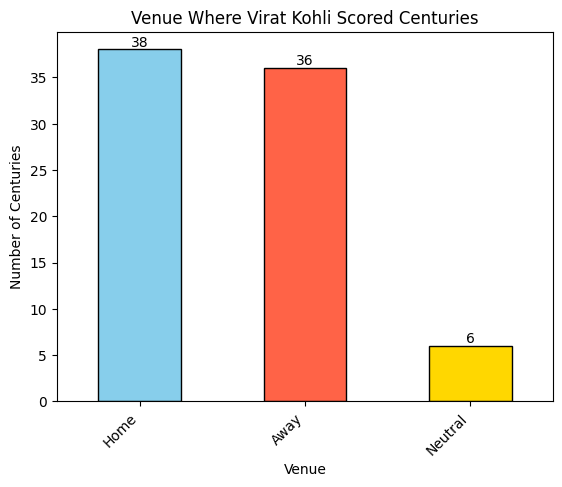

In [15]:
colors=['skyblue','tomato','gold']
df['Ground'].value_counts().plot(kind='bar',color=colors,edgecolor='black')
plt.title('Venue Where Virat Kohli Scored Centuries')

for index, value in enumerate(df['Ground'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Venue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of Centuries')
plt.show()

#### Virat Kohli is Equally good in both Home and Away

### Staying Till The End - 

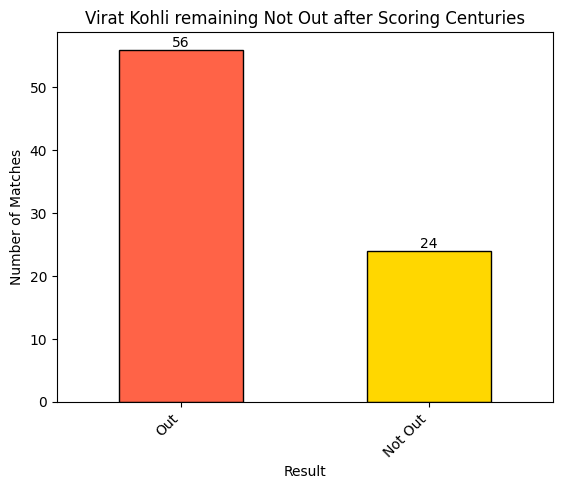

In [16]:
colors=['tomato','gold']
df['NotOut'].value_counts().plot(kind='bar',color=colors,edgecolor='black')
plt.title('Virat Kohli remaining Not Out after Scoring Centuries')

for index, value in enumerate(df['NotOut'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Result')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of Matches')
plt.show()

#### Remaining Not Out in 24 innings Which is pretty Descent as he Bats in the top order

### Best Position for Virat Kohli -

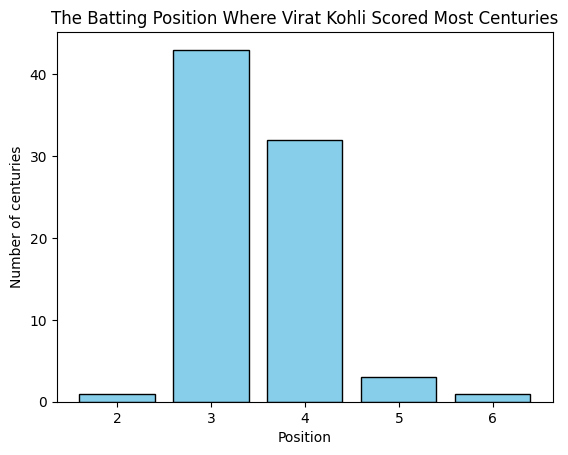

In [17]:
plt.bar(df['Position'].value_counts().index, df['Position'].value_counts().values,color='skyblue', edgecolor='black')
plt.title('The Batting Position Where Virat Kohli Scored Most Centuries')    
plt.xlabel('Position')
plt.ylabel('Number of centuries')
plt.show()

#### Virat Kohli Scored most of his Centuries batting at no 3

### Number of Centuries Against Different Teams - 

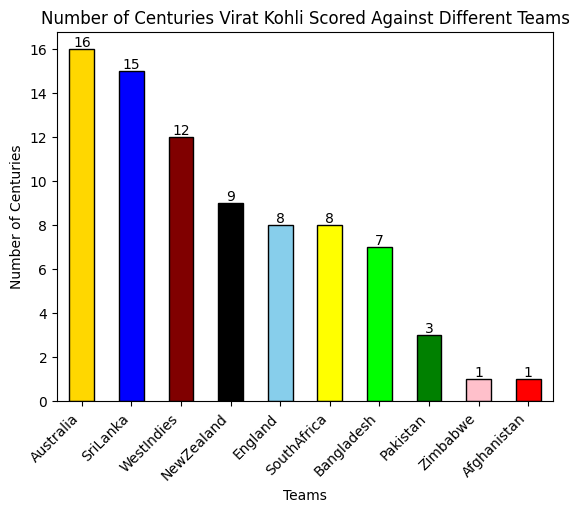

In [18]:
colors=['gold','blue','maroon','black','skyblue','yellow','lime','green','pink','red']
df['Against'].value_counts().plot(kind='bar',color=colors,edgecolor='black')
plt.title('Number of Centuries Virat Kohli Scored Against Different Teams')

for index, value in enumerate(df['Against'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Teams')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of Centuries')
plt.show()

#### Apparently it Shows Domination against Australia Scoring 16 Centuries

### Analyzing the Centuries Against Australia -

In [19]:
df_aus = df[df['Against']== 'Australia']
df_aus

,No.,Runs,Against,Position,Innings,Ground,Date,Result,Year,NotOut
2,3,118,Australia,3,2,Home,2010-10-20,Won,2010,Out
8,9,116,Australia,6,2,Away,2012-01-24,Lost,2012,Out
16,17,107,Australia,5,2,Home,2013-02-22,Won,2013,Out
19,20,100,Australia,3,2,Home,2013-10-16,Won,2013,Not Out
20,21,115,Australia,3,2,Home,2013-10-30,Won,2013,Not Out
27,28,115,Australia,4,2,Away,2014-12-09,Lost,2014,Out
28,29,141,Australia,4,4,Away,2014-12-09,Lost,2014,Out
29,30,169,Australia,4,2,Away,2014-12-26,Drawn,2014,Out
30,31,147,Australia,4,2,Away,2015-01-06,Drawn,2015,Out
34,35,117,Australia,3,1,Away,2016-01-17,Lost,2016,Out


In [20]:
average_run_aus = df_aus['Runs'].mean()
print(f"The Average Run Virat Kohli Scores whenever he scores a century against Australia is {average_run_aus}")

The Average Run Virat Kohli Scores whenever he scores a century against Australia is 125.1875


#### The Average Run Virat Kohli Scores whenever he scores a century against Australia is 125.1875 Which is Less than his Overall Average

### Number of Centuries he Scored Against Australia Each Year -

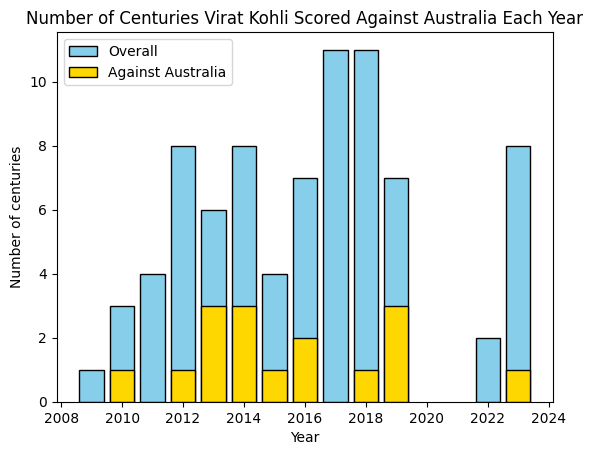

In [21]:
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts().values,color='skyblue', edgecolor='black',label='Overall')
plt.bar(df_aus['Year'].value_counts().index, df_aus['Year'].value_counts().values,color='gold', edgecolor='black',label='Against Australia')
plt.title('Number of Centuries Virat Kohli Scored Against Australia Each Year')    
plt.xlabel('Year')
plt.ylabel('Number of centuries')
plt.legend()
plt.show()

#### Although Virat Kohli Gave his Peak Performance in 2017-2018 
#### But in 2013-2014 he gave his peak performance against Australia 
#### Where He Scored 6 centuries against Australia out of his 14 total centuries

### Venues Where Virat Kohli Scored Centuries Against Australia -

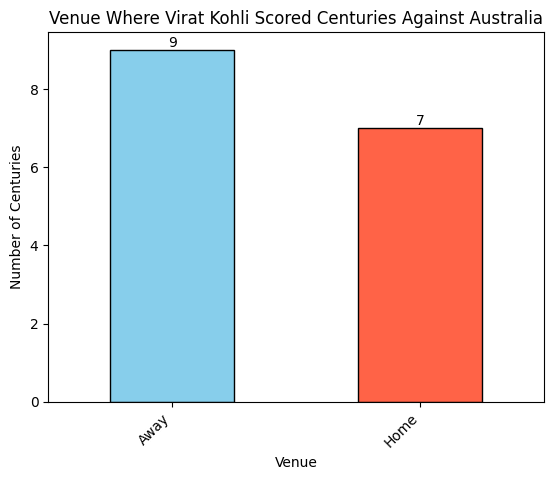

In [23]:
colors=['skyblue','tomato','gold']
df_aus['Ground'].value_counts().plot(kind='bar',color=colors,edgecolor='black')
plt.title('Venue Where Virat Kohli Scored Centuries Against Australia')

for index, value in enumerate(df_aus['Ground'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Venue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of Centuries')
plt.show()

#### Most of Virat Kohli's Centuries against Australia are scored at Audtralia
#### Does it Show he dominated Australia in Australia as Fans Says it
### Let's See the Impact of Centuries against Australia -

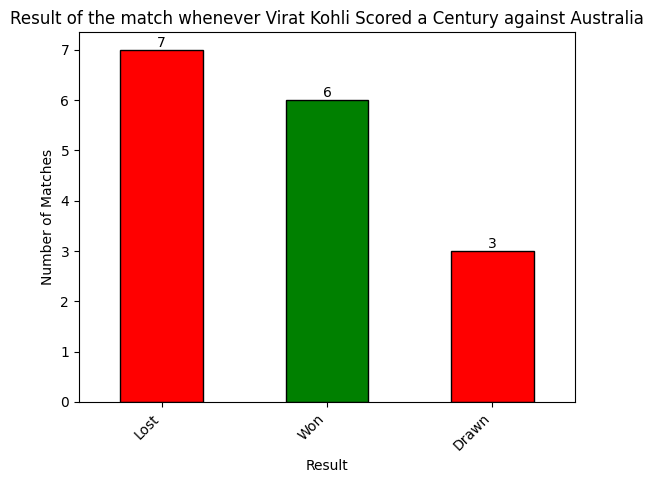

In [24]:
colors=['red','green']
df_aus['Result'].value_counts().plot(kind='bar',color=colors,edgecolor='black')
plt.title('Result of the match whenever Virat Kohli Scored a Century against Australia')

for index, value in enumerate(df_aus['Result'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Result')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of Matches')
plt.show()

#### As we have seen earlier out of 80 matches in which Kohli scored a ton India only lost 14 matches
#### and out of those 14 matches 7 are lost against Australia only 6 matches went in favour of India
### Let's Check the Venues of those 6 Matches - 

In [25]:
df_aus_won=df_aus[df_aus['Result']=='Won']
df_aus_won

,No.,Runs,Against,Position,Innings,Ground,Date,Result,Year,NotOut
2,3,118,Australia,3,2,Home,2010-10-20,Won,2010,Out
16,17,107,Australia,5,2,Home,2013-02-22,Won,2013,Out
19,20,100,Australia,3,2,Home,2013-10-16,Won,2013,Not Out
20,21,115,Australia,3,2,Home,2013-10-30,Won,2013,Not Out
63,64,104,Australia,3,2,Away,2019-01-15,Won,2019,Out
64,65,116,Australia,3,1,Home,2019-03-05,Won,2019,Out


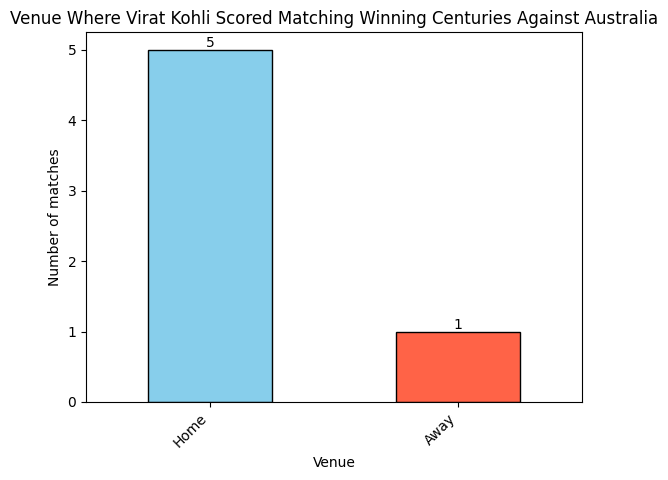

In [26]:
colors=['skyblue','tomato','gold']
df_aus_won['Ground'].value_counts().plot(kind='bar',color=colors,edgecolor='black')
plt.title('Venue Where Virat Kohli Scored Matching Winning Centuries Against Australia')

for index, value in enumerate(df_aus_won['Ground'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Venue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of matches')
plt.show()

#### Out of All 6 Wins against Australia 5 of Them were at Home
### Although Virat Kohli Scored 9 Centuries in Australia but only 1 of them was a match winning Century
### So the Centuries that Virat Kohli Scored in Australia were not as Impactful as it is at home
### At Home Grounds Kohli Scored 7 Centuries against Australia 5 of them were match winning